# Programiranje: skriptni jezici

## Bank marketing dataset

Ovaj projekt će se temeljiti na testiranju različitih modela strojnog učenja na Bank Marketing setu podataka. <br>
Sljedeći kod uključuje nekoliko osnovnih koraka koji se provode prilikom implementacije i testiranja različitih modela 
strojnog učenja. <br>
**Koraci koji će se obaviti prilikom rada na zadanom problemu su:** <br>
    <ol>
      <li>Učitavanje i prikaz podataka</li>
      <li>Trend i prilagodba podataka</li>
      <li>Implementacija i treniranje različitih modela</li>
      <li>Testiranje modela</li>
      <li>Usporedba algoritama</li>
    </ol>

## Učitavanje programskih knjižnica i alata

In [1]:
# učitavanje potrebnih programskih knjižnica
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Učitavanje i prikaz podataka

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.describe() #opis numeričkih podataka po atributima, srednje vrijednosti, min, max...

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.info() #nema null-vrijednosti
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#podjela podataka na numeričke i kategoričke
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_values = [x for x in df.columns.to_list() if x not in categorical_variables]
numerical_values.remove('y')

In [8]:
print('Categorical features:', categorical_variables)
print('Numerical features:', numerical_values)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


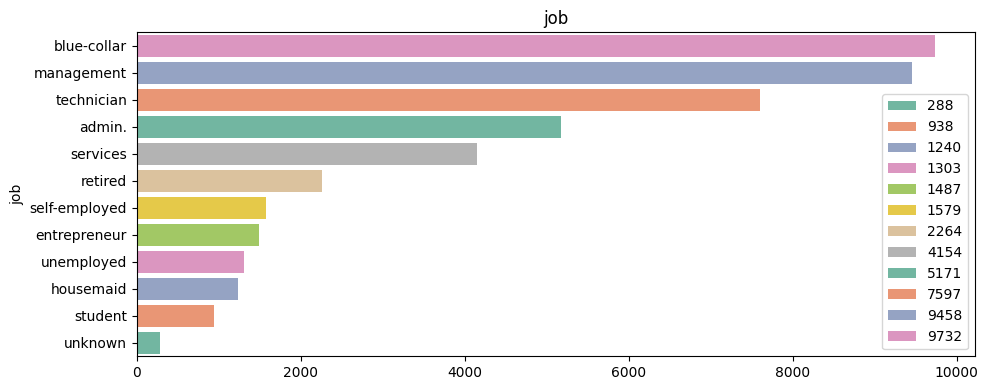

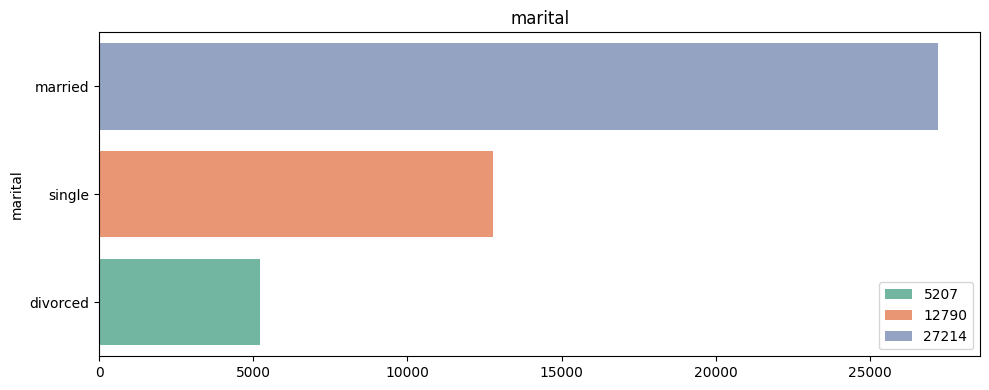

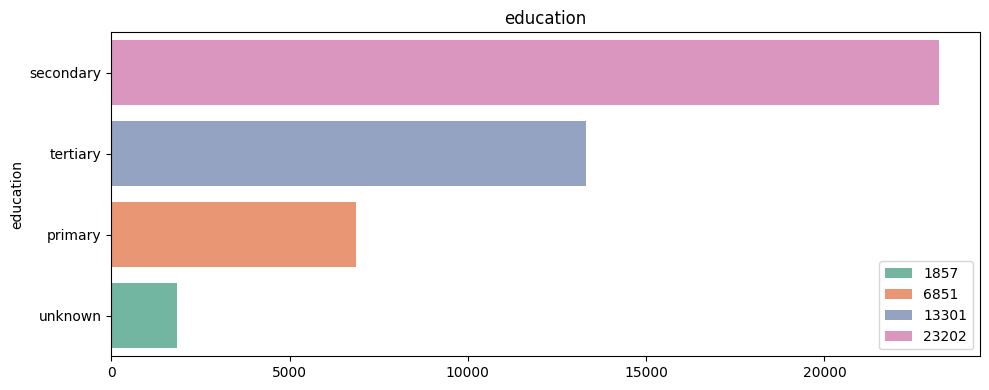

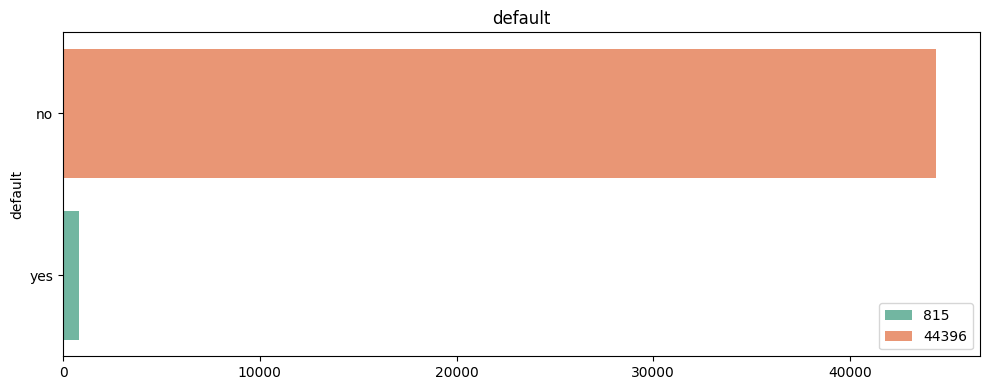

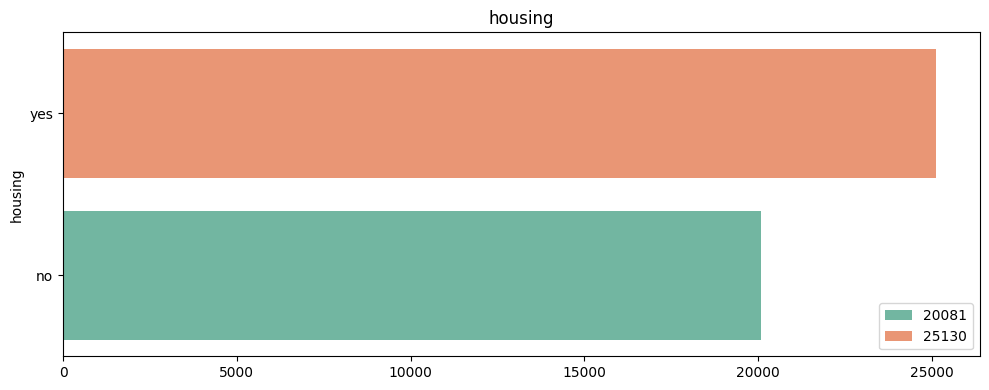

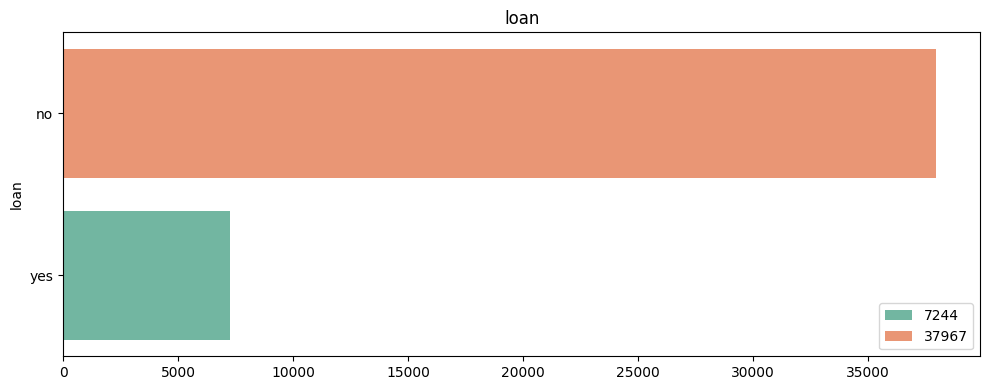

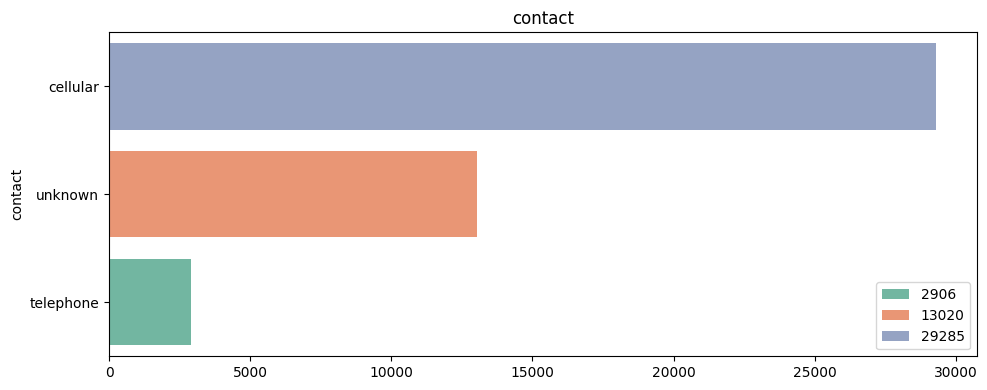

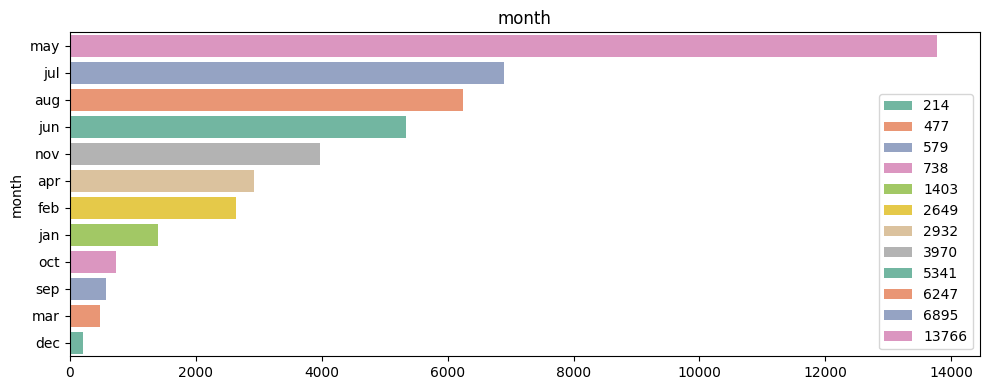

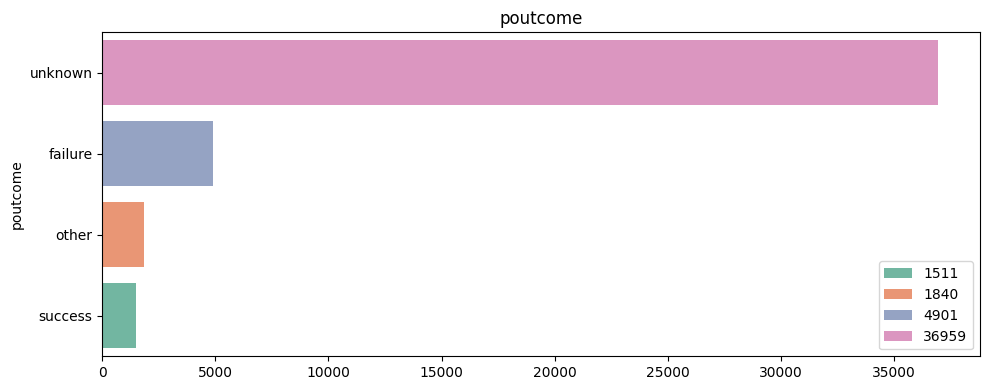

In [9]:
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index, hue=df[col].value_counts().values, palette='Set2')
    plt.title(col)
    plt.tight_layout()

Text(0.5, 0, 'Target class')

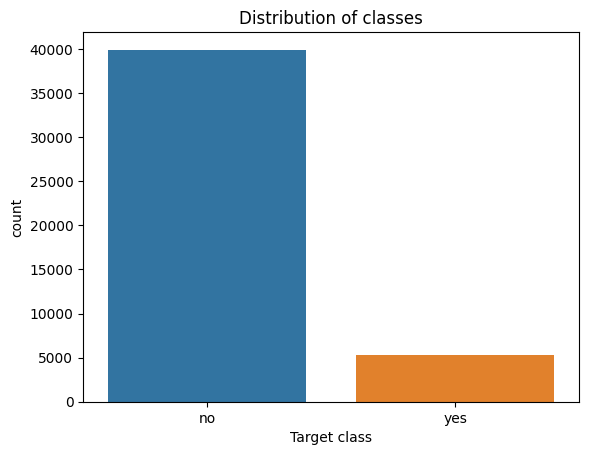

In [10]:
df['y'].value_counts() #omjer pozitivnih i negativnih ishoda
sns.countplot(x=df['y'], hue=df['y'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

Text(0.5, 0, 'y:target variable')

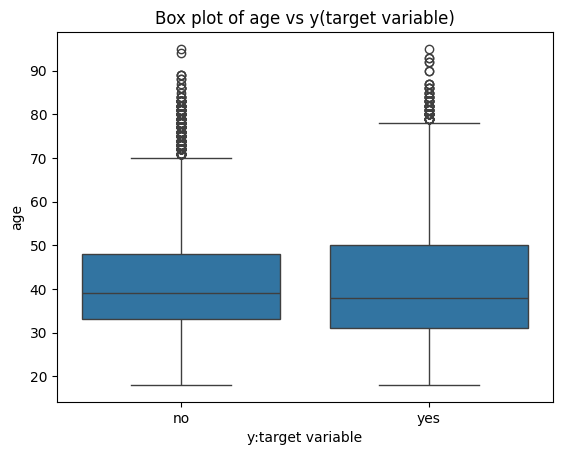

In [11]:
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

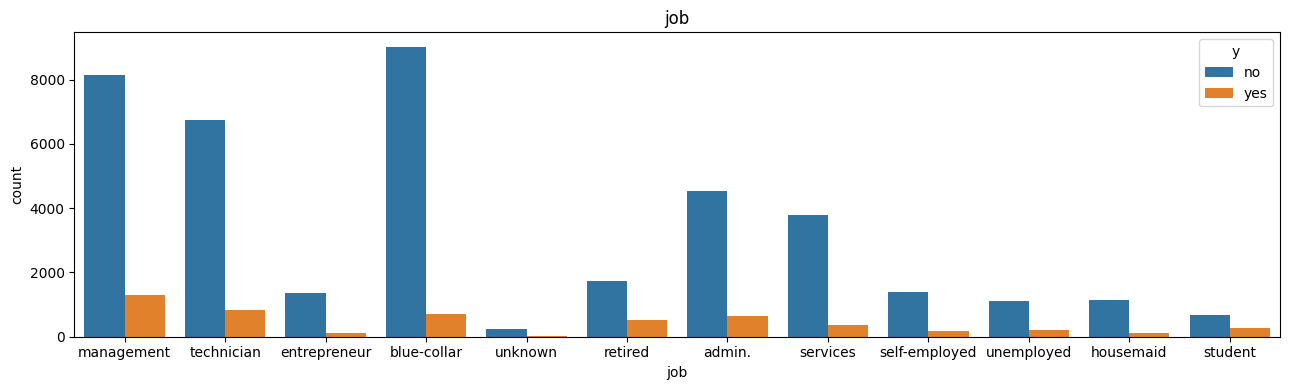

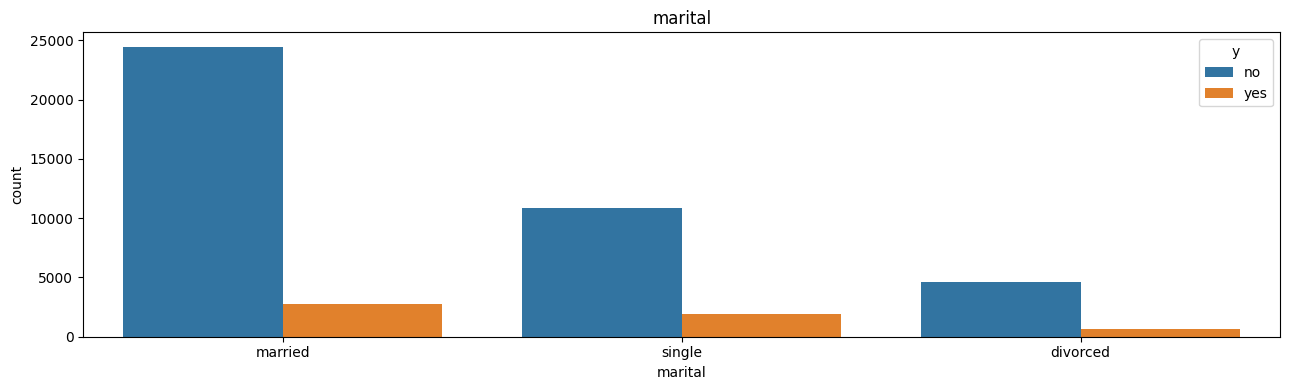

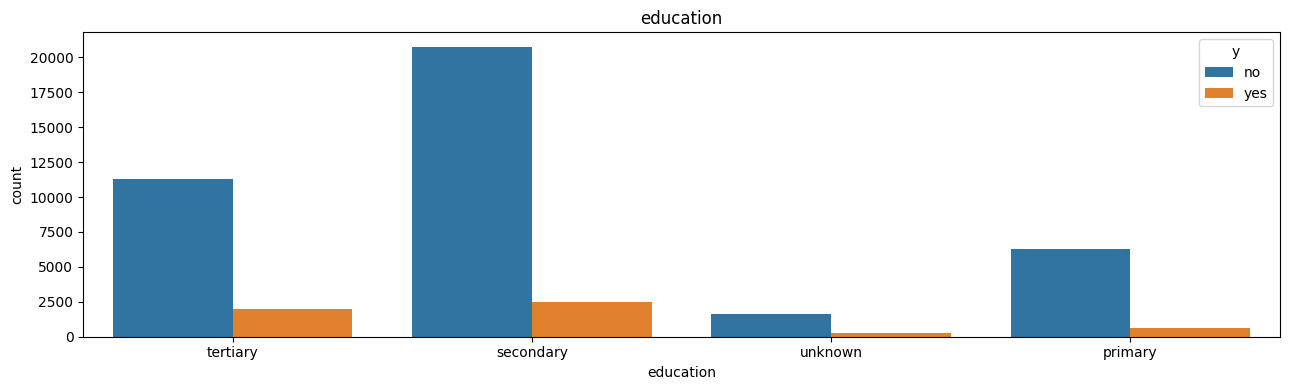

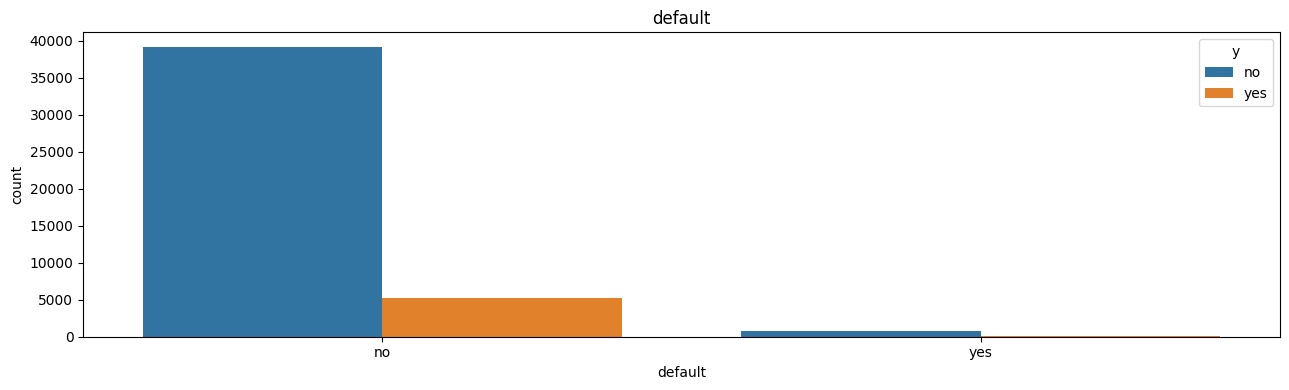

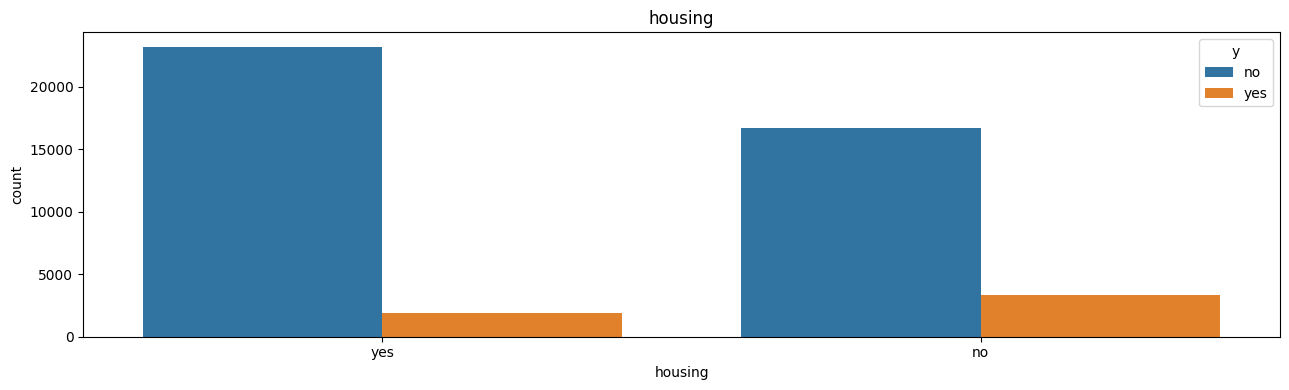

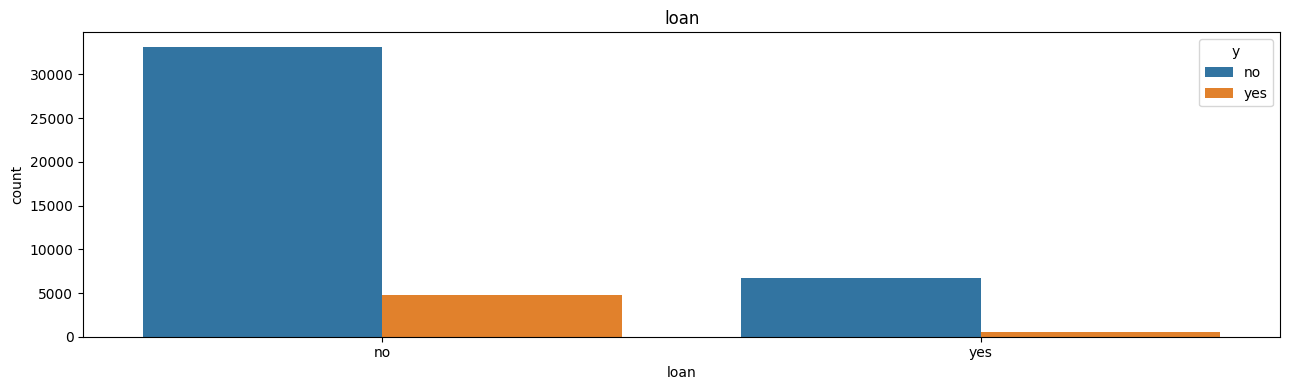

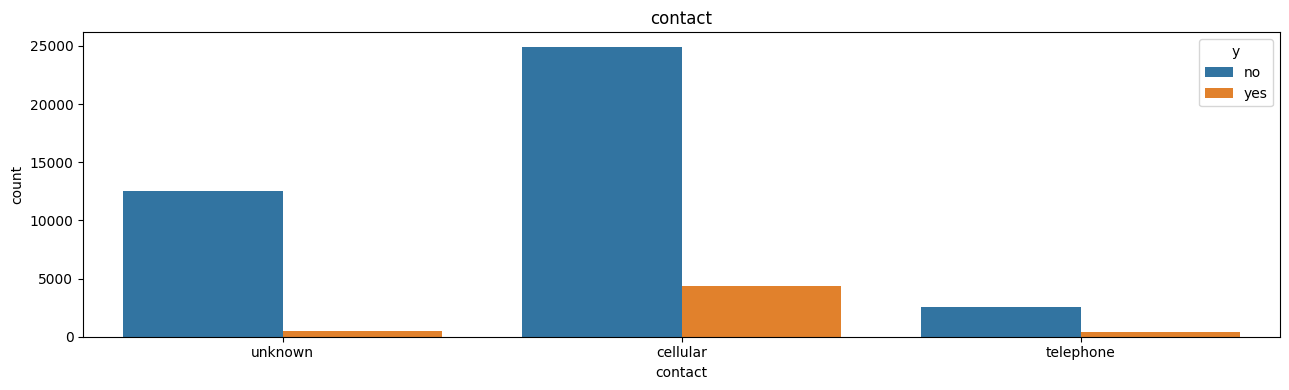

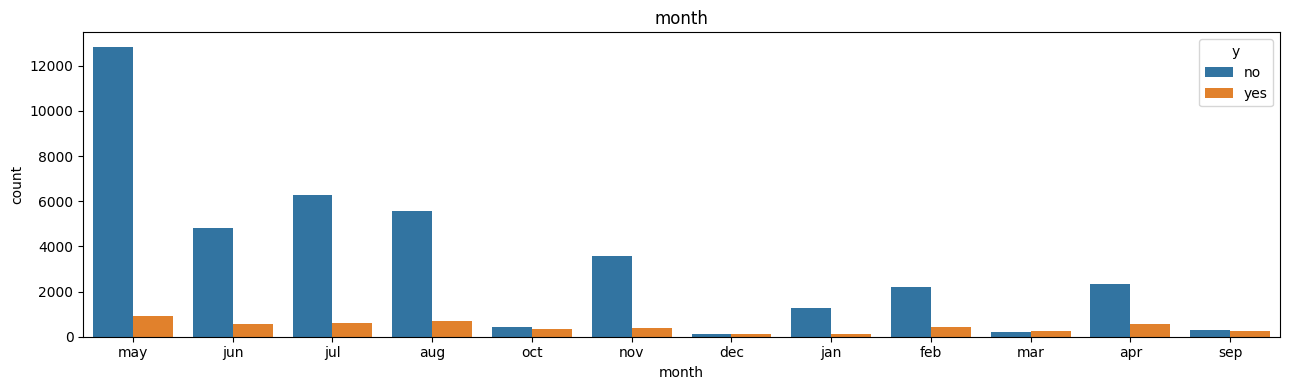

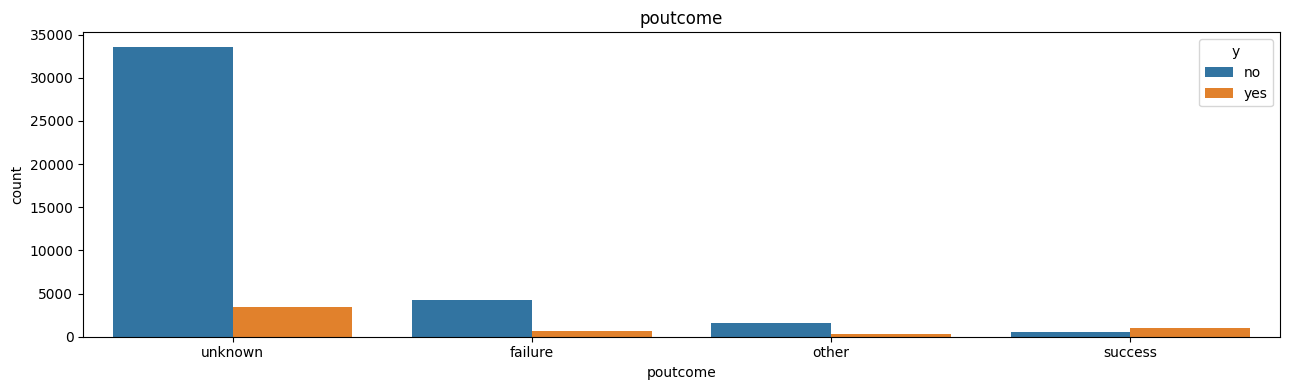

In [12]:
for col in categorical_variables:
    plt.figure(figsize=(13,4))
    sns.countplot(x=df[col], data=df, hue=df['y'])
    plt.title(col)
    plt.tight_layout()

### Matrica korelacije

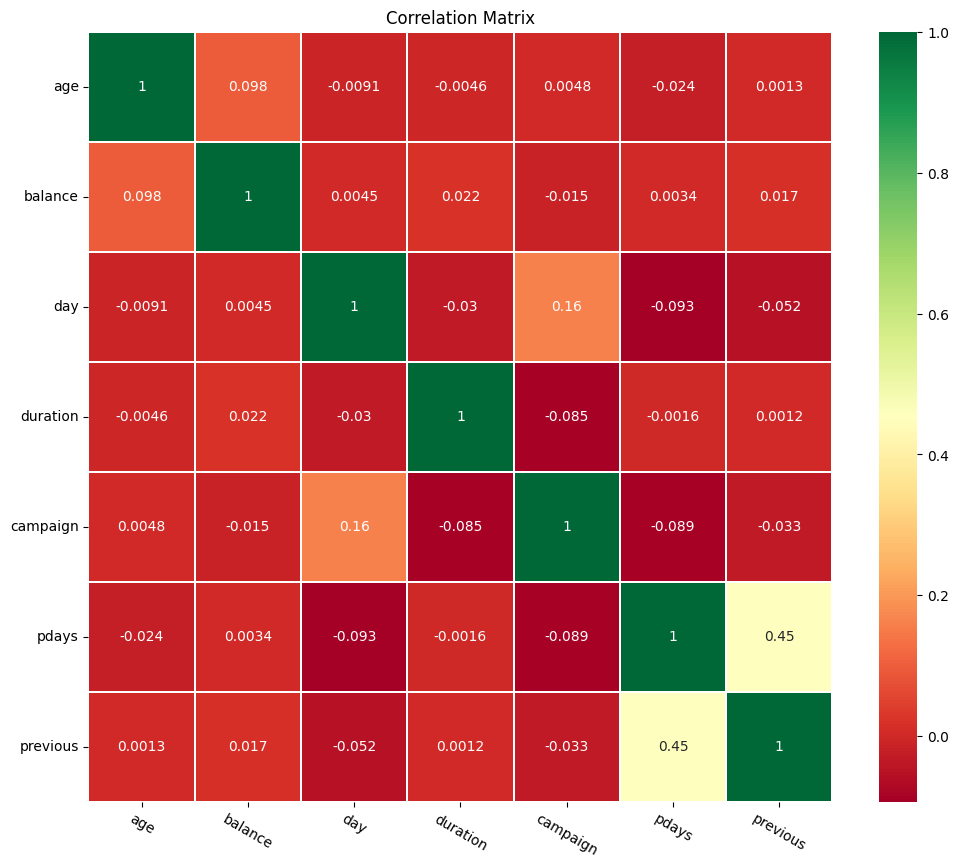

In [13]:
corr_data = df[numerical_values]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Priprema podataka za treniranje

In [15]:
#zamjena vrijednosti yes i no s boolean vrijednostima
df['default'] = df['default'].apply(lambda x: 0 if x == 'no' else 1)
df['housing'] = df['housing'].apply(lambda x: 0 if x == 'no' else 1)
df['loan'] = df['loan'].apply(lambda x: 0 if x == 'no' else 1)
df['y'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [16]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

### Standardizacija podataka 

In [17]:
y = df['y']
X = df.drop('y', axis=1)
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

In [18]:
categorical_cols

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

In [19]:
numeric_cols

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous'],
      dtype='object')

In [20]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


### Podjela podataka na setove za treniranje i testiranje (80%20%)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print('Train data shape {} {}'.format(X_train.shape, y_train.shape))
print('Test data shape {} {}'.format(X_test.shape, y_test.shape))

Train data shape (36168, 16) (36168,)
Test data shape (9043, 16) (9043,)


In [24]:
X_train= preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [25]:
X_train.shape

(36168, 48)

In [26]:
X_test.shape

(9043, 48)

# Testiranje različitih modela na zadanom problemu

## Funkcija za ispis rezultata 

In [27]:
scores = {}

In [28]:
roc_curves = {}

In [29]:
def print_result(model, y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test):
    print(f"{model}:")
    print("\n")
    
    print("Accuracy Score : ")
    accuracy_score1 = accuracy_score(y_test, y_predicted_test)
    print(accuracy_score1)
    print('*'*50)
    
    print("Precision Score : ")
    precision_score1= precision_score(y_test, y_predicted_test)
    print(precision_score1)
    print('*'*50)
    
    print("Recall Score : ")
    recall_score1 = recall_score(y_test, y_predicted_test)
    print(recall_score1)
    print('*'*50)
    
    print("F1 Score : ")
    f1_score1 = f1_score(y_test, y_predicted_test)
    print(f1_score1)
    print('*'*50)
    
    y_probs_train = y_probs_train[:, 1]
    y_probs_test = y_probs_test[:, 1]

    train_auc = roc_auc_score(y_train, y_probs_train)
    test_auc = roc_auc_score(y_test, y_probs_test)
    print('Train AUC: %.3f' % train_auc)
    print('Test AUC: %.3f' % test_auc)
    print('*'*50)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
    plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()
    
    cma = confusion_matrix(y_test, y_predicted_test)
    print('Confusion matrix:\n', cma)
    df_cm = pd.DataFrame(cma, range(2), columns=range(2))
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
    
    scores[model] = [accuracy_score1, precision_score1, recall_score1, f1_score1, test_auc]
    roc_curves[model] = [test_fpr, test_tpr]

# Lineara regresija

### Optimizacija hiperparametara

In [30]:
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

model = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 5}
Best score: 0.9100747969351554


Logistic Regression:


Accuracy Score : 
0.8430830476611744
**************************************************
Precision Score : 
0.42350746268656714
**************************************************
Recall Score : 
0.8322639780018332
**************************************************
F1 Score : 
0.5613601236476043
**************************************************
Train AUC: 0.912
Test AUC: 0.908
**************************************************


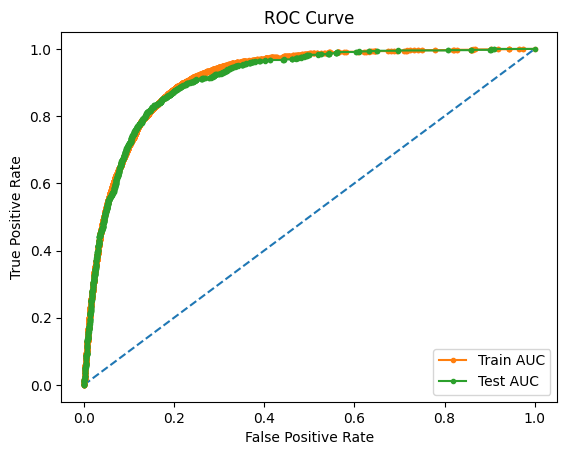

Confusion matrix:
 [[6716 1236]
 [ 183  908]]


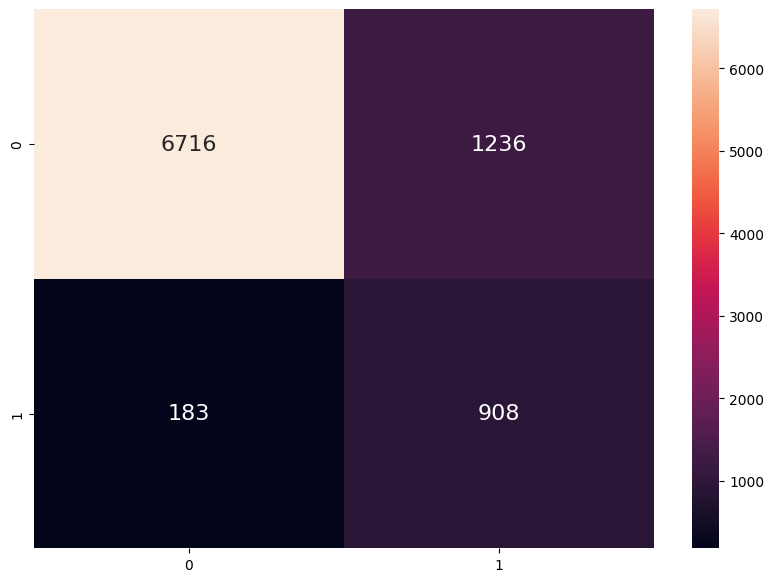

In [31]:
model = LogisticRegression(C=5, class_weight='balanced', n_jobs=-1)
model.fit(X_train, y_train)
y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('Logistic Regression', y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# KNN algoritam

### Optimizacija hiperparametara

In [32]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_dist_knn = {
    'knn__n_neighbors': np.arange(1, 21), 
    'knn__weights': ['uniform', 'distance'],  
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev'] 
}

random_search_knn = RandomizedSearchCV(pipeline_knn, param_distributions=param_dist_knn, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
random_search_knn.fit(X_train, y_train)

best_knn_model_rs = random_search_knn.best_estimator_

print("Best k-Nearest Neighbors Hyperparameters (Randomized Search):", random_search_knn.best_params_)

Best k-Nearest Neighbors Hyperparameters (Randomized Search): {'knn__weights': 'distance', 'knn__n_neighbors': 17, 'knn__metric': 'manhattan'}


KNN:


Accuracy Score : 
0.8970474400088466
**************************************************
Precision Score : 
0.7150537634408602
**************************************************
Recall Score : 
0.24381301558203483
**************************************************
F1 Score : 
0.36363636363636365
**************************************************
Train AUC: 1.000
Test AUC: 0.896
**************************************************


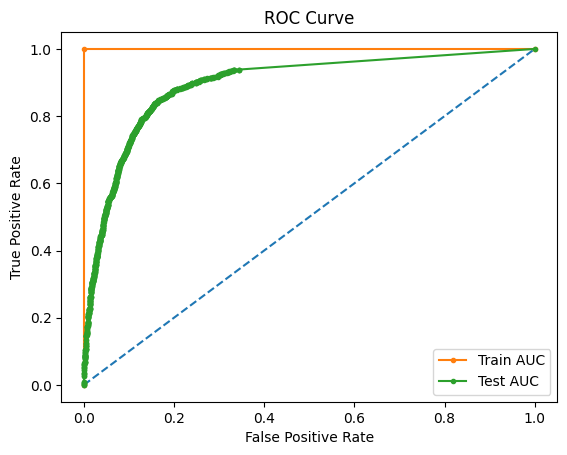

Confusion matrix:
 [[7846  106]
 [ 825  266]]


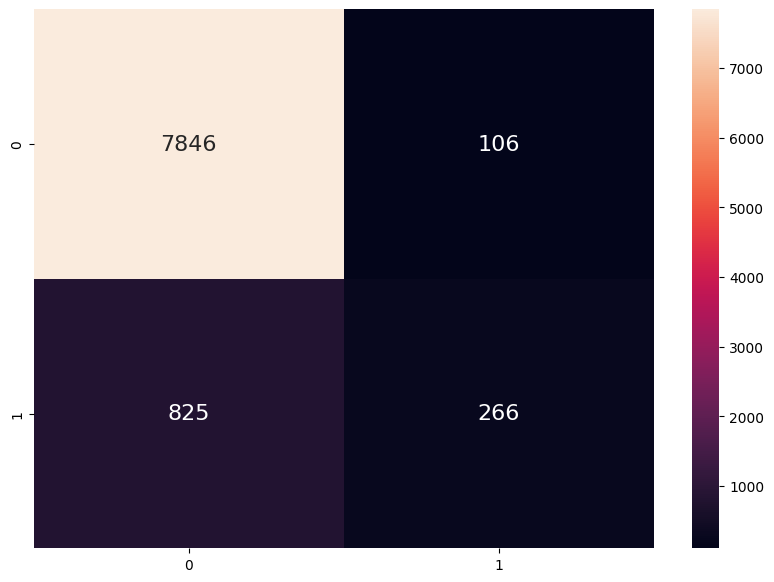

In [33]:
model = KNeighborsClassifier(n_neighbors=17, weights='distance', metric='manhattan')
model.fit(X_train, y_train)

y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('KNN',y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# Stabla odluke

### Optimizacija hiperparametara

In [34]:
dt_model = DecisionTreeClassifier(random_state=42)

param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_dist_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_dt.fit(X_train, y_train)

best_dt_model = random_search_dt.best_estimator_

print("Best Decision Tree Hyperparameters (Randomized Search):", random_search_dt.best_params_)

Best Decision Tree Hyperparameters (Randomized Search): {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}


DecisionTree:


Accuracy Score : 
0.8950569501271702
**************************************************
Precision Score : 
0.6109375
**************************************************
Recall Score : 
0.35838680109990834
**************************************************
F1 Score : 
0.4517619872905835
**************************************************
Train AUC: 0.915
Test AUC: 0.878
**************************************************


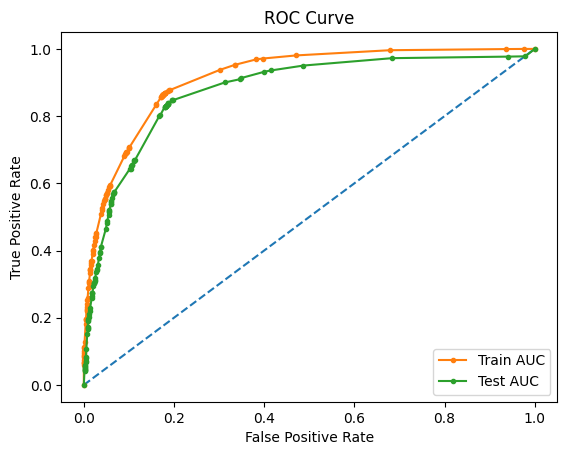

Confusion matrix:
 [[7703  249]
 [ 700  391]]


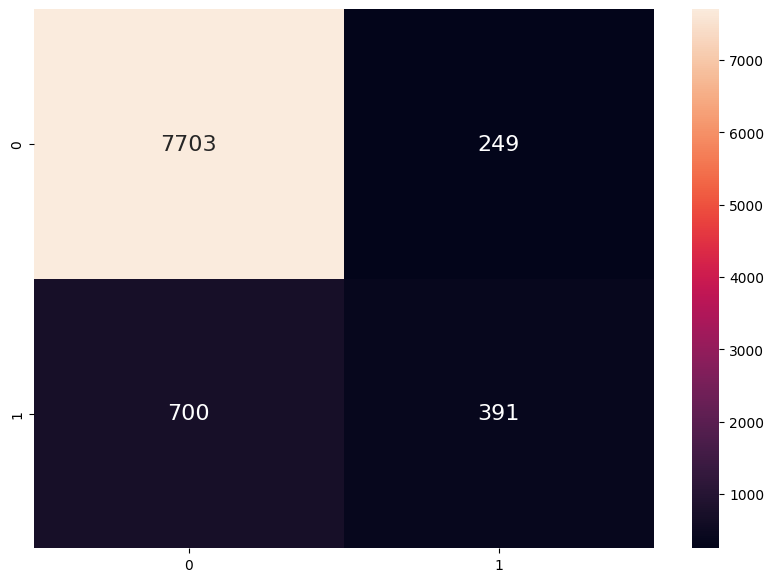

In [35]:
model = DecisionTreeClassifier(splitter='random', min_samples_split=2, min_samples_leaf=4, max_depth=10, criterion='entropy')
model.fit(X_train, y_train)

y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('DecisionTree',y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# Random forest

### Optimizacija hiperparametara

In [36]:
params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 250, 'max_depth': 25}
Best score: 0.9301677654907442


RandomForest:


Accuracy Score : 
0.9039035718235099
**************************************************
Precision Score : 
0.6712962962962963
**************************************************
Recall Score : 
0.3987167736021998
**************************************************
F1 Score : 
0.5002875215641173
**************************************************
Train AUC: 1.000
Test AUC: 0.929
**************************************************


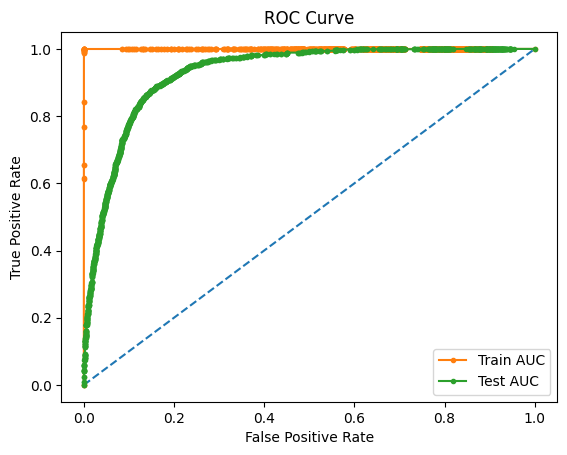

Confusion matrix:
 [[7739  213]
 [ 656  435]]


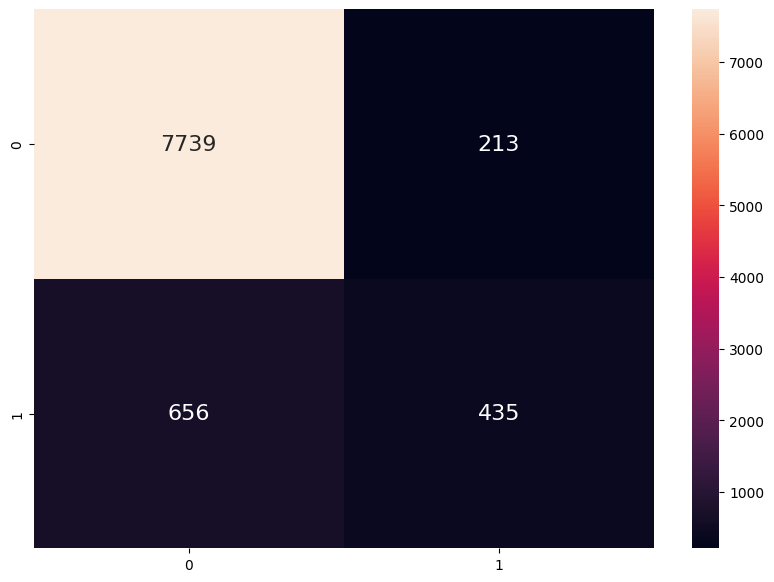

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250, max_depth=25, class_weight='balanced', n_jobs=-1)
model.fit(X_train, y_train)
y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('RandomForest',y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# SVM

### Optimizacija hiperparametara

In [ ]:
svm_model = SVC(random_state=42)

param_dist_svm = {
    'C': [0.1, 1, 10, 100],           
    'kernel': ['linear', 'rbf'],   
    'gamma': ['scale', 'auto']  
}

random_search_svm = RandomizedSearchCV(svm_model, param_distributions=param_dist_svm, cv=5, scoring='roc_auc', random_state=42)
random_search_svm.fit(X_train, y_train)

best_svm_model = random_search_svm.best_estimator_

print("Best SVM Hyperparameters (Randomized Search):", random_search_svm.best_params_)

SVM:


Accuracy Score : 
0.9039035718235099
**************************************************
Precision Score : 
0.6933797909407665
**************************************************
Recall Score : 
0.36480293308890926
**************************************************
F1 Score : 
0.47807807807807806
**************************************************
Train AUC: 0.936
Test AUC: 0.910
**************************************************


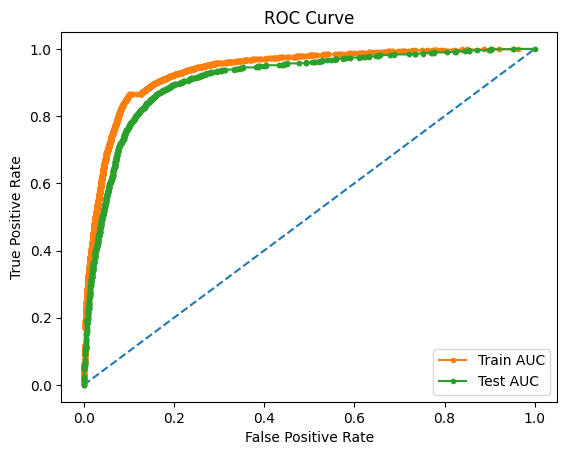

Confusion matrix:
 [[7776  176]
 [ 693  398]]


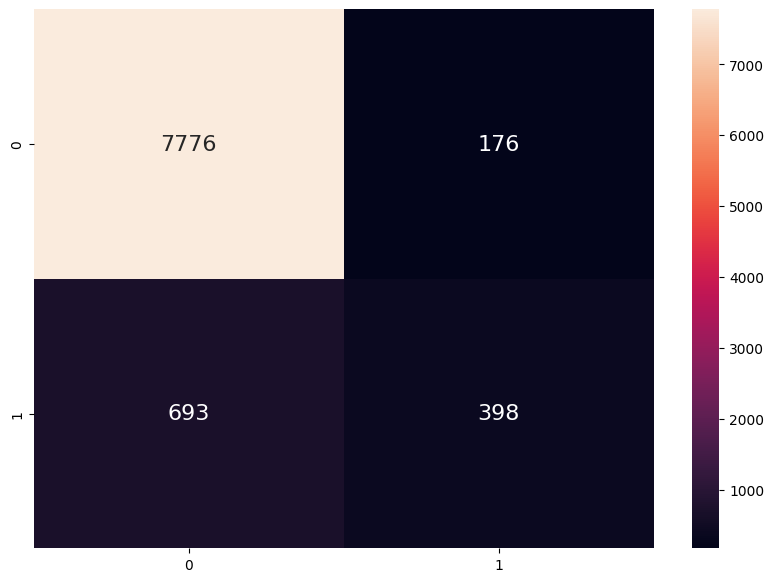

In [39]:
from sklearn.svm import SVC
model = SVC(probability=True, C=10, kernel='rbf', gamma='auto')
model.fit(X_train, y_train)
y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('SVM',y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# Gaussian Naive Bayes

### Optimizacija hiperparametara

In [40]:
nb_model = GaussianNB()

param_dist_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  
}

random_search_nb = RandomizedSearchCV(nb_model, param_distributions=param_dist_nb, n_iter=5, cv=5, scoring='roc_auc', random_state=42)
random_search_nb.fit(X_train, y_train)

best_nb_model = random_search_nb.best_estimator_

print("Best Naive Bayes Hyperparameters (Randomized Search):", random_search_nb.best_params_)

Best Naive Bayes Hyperparameters (Randomized Search): {'var_smoothing': 1e-05}


GaussianNB:


Accuracy Score : 
0.8483910206789782
**************************************************
Precision Score : 
0.39644970414201186
**************************************************
Recall Score : 
0.4912923923006416
**************************************************
F1 Score : 
0.43880474826033566
**************************************************
Train AUC: 0.812
Test AUC: 0.810
**************************************************


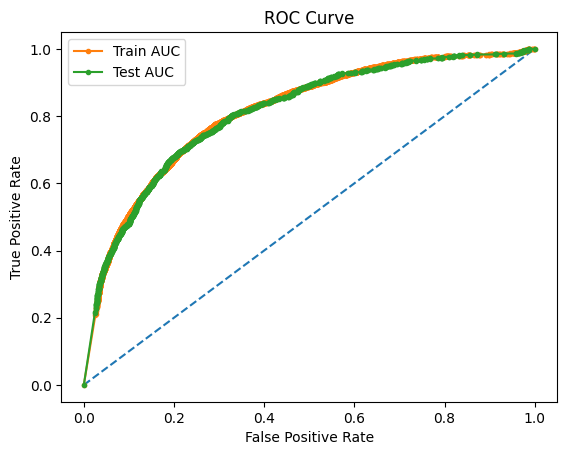

Confusion matrix:
 [[7136  816]
 [ 555  536]]


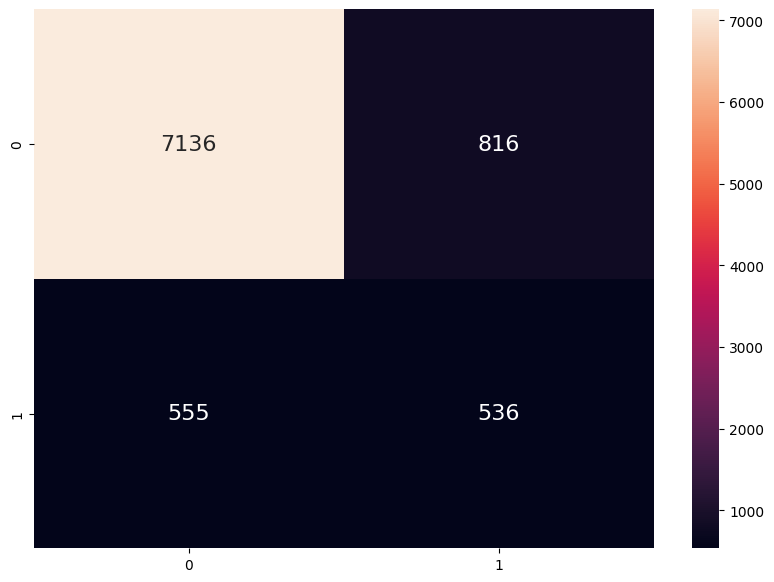

In [41]:
model = GaussianNB(var_smoothing=1e-05)
model.fit(X_train, y_train)
y_probs_train = model.predict_proba(X_train)
y_probs_test = model.predict_proba(X_test)
y_predicted_train = model.predict(X_train)
y_predicted_test = model.predict(X_test)

print_result('GaussianNB',y_test, y_probs_train, y_probs_test, y_predicted_train, y_predicted_test)

# Usporedba algoritama

## Usporedba performansi modela po osnovnim metrikama

In [42]:
df = pd.DataFrame.from_dict(scores, orient='index',
                       columns=['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

In [43]:
df_sorted = df.sort_values(by='Accuracy', ascending=False)

In [44]:
df_sorted

,Accuracy,Precision,Recall,F1,AUC
RandomForest,0.903904,0.671296,0.398717,0.500288,0.928864
SVM,0.903904,0.693380,0.364803,0.478078,0.910159
KNN,0.897047,0.715054,0.243813,0.363636,0.895989
DecisionTree,0.895057,0.610938,0.358387,0.451762,0.877608
GaussianNB,0.848391,0.396450,0.491292,0.438805,0.810194
Logistic Regression,0.843083,0.423507,0.832264,0.561360,0.907917


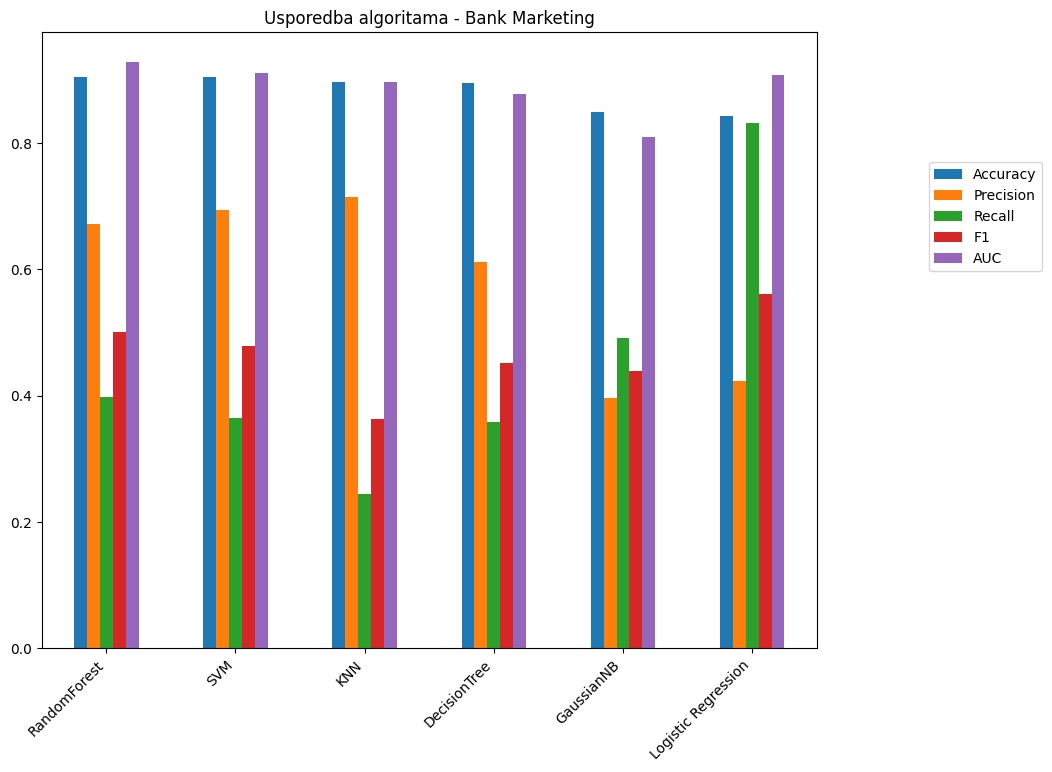

In [45]:
df_sorted.plot(y=df_sorted.columns, kind="bar", figsize=(10,8)) 
plt.xticks(rotation=45, ha='right')
plt.title("Usporedba algoritama - Bank Marketing")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8))

## Usporedba ROC krivulja

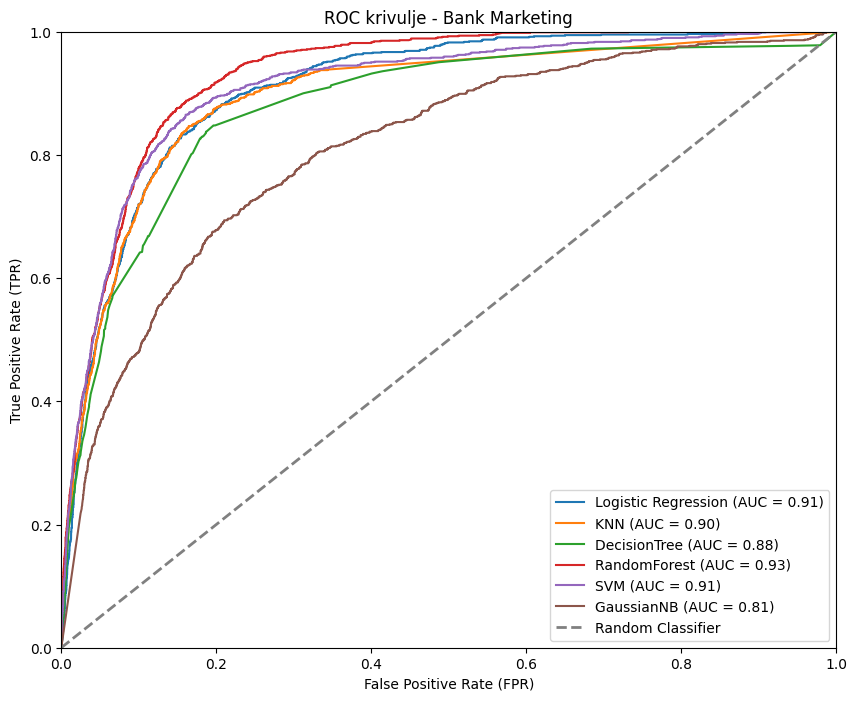

In [46]:
plt.figure(figsize=(10, 8))

for model in roc_curves:
    fpr = roc_curves[model][0]
    tpr = roc_curves[model][1]
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC krivulje - Bank Marketing')
plt.legend(loc='lower right')
plt.show()